In [1]:
import csv
import pandas as pd 
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [2]:
def generate_data(foldername):
    allfiles = [f"{foldername}/{f}" for f in listdir(foldername) if isfile(join(foldername, f))]
    num_cores = len(allfiles)
    #print(allfiles)
    all_data = {}
    #get number of files in folder
    for i in range(1, num_cores+1): #range(numberoffiles)
        filename = f"{foldername}/out_{i}.csv"
        #print(filename)
        assert filename in allfiles
        results = pd.read_csv(filename, sep=';')
        for i, row in results.iterrows():
            #print(row)
            desc = row['Descriptor']
            mode = row['Mode']
            if desc in all_data:
                if mode in all_data[desc]:
                    all_data[desc][mode] += [row['Mean']]
                else:
                    all_data[desc].update({mode: [row['Mean']]})
            else:
                all_data[desc] = {mode: [row['Mean']]}

    return all_data

{'PARALLEL_DOUBLE': [3.94128e-05, 2.46912e-05, 2.33677e-05, 2.58708e-05, 2.83794e-05, 3.2851999999999996e-05, 3.87555e-05, 4.77588e-05, 5.66159e-05, 6.84173e-05, 8.14745e-05, 9.84369e-05, 0.00011247299999999999, 0.000128649, 0.00013872100000000002, 0.000150226, 0.000152543, 0.000161747, 0.00017146400000000002, 0.000183097, 0.000192317, 0.00019571, 0.00020828400000000001, 0.00022240900000000002, 0.000228492, 0.000238638, 0.000244519, 0.000257819], 'PARALLEL_SINGLE': [3.4243000000000004e-05, 2.66243e-05, 2.90722e-05, 3.05349e-05, 4.0061e-05, 5.0323e-05, 6.31905e-05, 7.37033e-05, 8.26742e-05, 9.41768e-05, 0.00010792399999999999, 0.000126005, 0.000139576, 0.000154494, 0.000168312, 0.00018062, 0.00018344299999999998, 0.000192306, 0.000200575, 0.000208278, 0.000217035, 0.00021611799999999998, 0.000231269, 0.00023852900000000002, 0.000258662, 0.000270344, 0.00027250099999999997, 0.000301302]}
{'PARALLEL_DOUBLE': [0.000549401, 0.00044479800000000005, 0.00030554700000000003, 0.000310084, 0.0002

<Figure size 432x288 with 0 Axes>

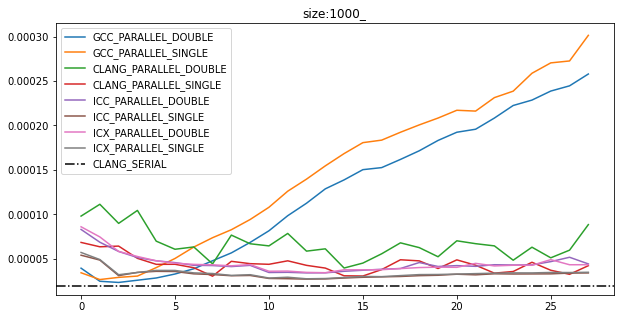

<Figure size 432x288 with 0 Axes>

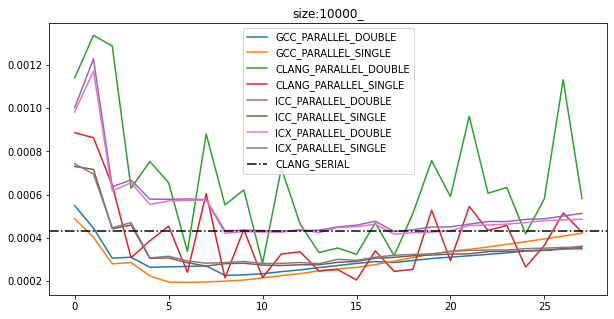

<Figure size 432x288 with 0 Axes>

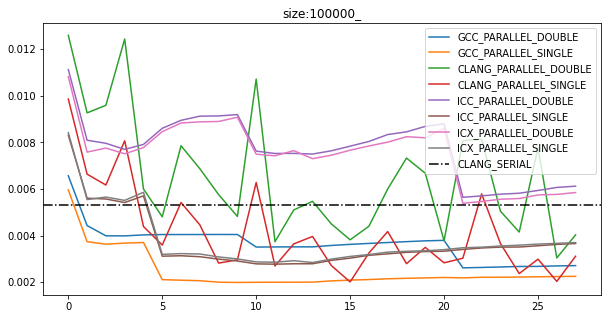

<Figure size 432x288 with 0 Axes>

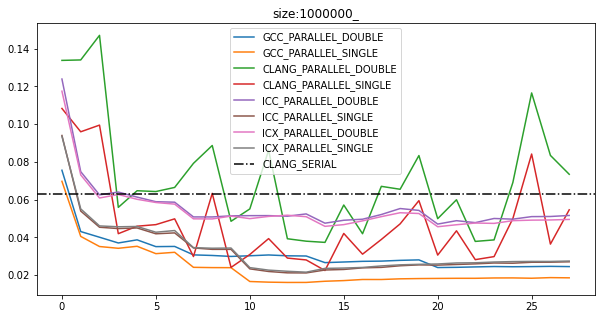

<Figure size 432x288 with 0 Axes>

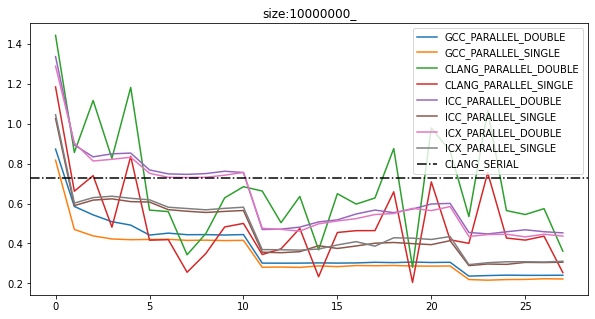

In [5]:

benchmarks = ['quicksort']
for bench in benchmarks:
    gcc_data = generate_data(f"gcc_results/{bench}")# pass folder name
    clang_data = generate_data(f"clang_results/{bench}")# pass folder name
    icc_data = generate_data(f"icc_results/{bench}")# pass folder name
    icx_data = generate_data(f"icx_results/{bench}")# pass folder name
    descriptors = list(gcc_data.keys())
    for desc in descriptors:
        assert desc in clang_data
        #print(all_data.keys())
        serial_gcc = gcc_data[desc].pop('SERIAL', None)
        serial_clang = clang_data[desc].pop('SERIAL', None)
        serial_icc = icc_data[desc].pop('SERIAL', None)
        serial_icx = icx_data[desc].pop('SERIAL', None)
        #print(all_data[desc])
        gcc_results = pd.DataFrame(data=gcc_data[desc])
        gcc_results = gcc_results.add_prefix('GCC_')
        clang_results = pd.DataFrame(data=clang_data[desc])
        clang_results = clang_results.add_prefix('CLANG_')
        icc_results = pd.DataFrame(data=icc_data[desc])
        icc_results = icc_results.add_prefix('ICC_')
        icx_results = pd.DataFrame(data=icx_data[desc])
        icx_results = icx_results.add_prefix('ICX_')
        plt.figure()
        p = gcc_results.plot(title=desc, figsize=(10,5))

        #plt.axhline(y=serial_gcc, color='cyan', linestyle='dashed', label='GCC_SERIAL')
        p = clang_results.plot(ax=p)
        p = icc_results.plot(ax=p)
        p = icx_results.plot(ax=p)
        print(gcc_data[desc])
        plt.axhline(y=serial_clang, color='black', linestyle='dashdot', label='CLANG_SERIAL')
        plt.legend()
        